<a href="https://colab.research.google.com/github/helmana/DLeeg/blob/master/model%20layers%20pop/(T)cosian%20dist_%2025%20instance_2000%20pair_%208%20outer%20shift_Threshold%20verification%20with%20Middle_TP-FN_TN-FP_FAR-FFR-EER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
subject number = 109 >> 90 train subject  + 19 new subject 
channel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]

model3 -  1 layer pop

** subjects  (train subject (ts) , new subject (ns) ):

1) Train subject i (ts[i] )
2) Train Subject i and Train Subject j (ts[i] , ts[j] )
3) Train subject and New subject  (ts , ns)
4) New subject i ( ns[i] )
5) New Subject i and New Subject j (ns[i] , ns[j] )

'''


'\nsubject number = 109 >> 90 train subject  + 19 new subject \nchannel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]\n\nmodel3 -  1 layer pop\n\n** subjects  (train subject (ts) , new subject (ns) ):\n\n1) Train subject i (ts[i] )\n2) Train Subject i and Train Subject j (ts[i] , ts[j] )\n3) Train subject and New subject  (ts , ns)\n4) New subject i ( ns[i] )\n5) New Subject i and New Subject j (ns[i] , ns[j] )\n\n'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!pip install mne

     |████████████████████████████████| 6.4MB 4.3MB/s 


In [0]:
'''
Rivision:
980806:
  First version.
  
  

'''

'\nRivision:\n980806:\n  First version.\n  \n  \n\n'

In [0]:
# Parameters:

EpochNum=60
subject_numberT=109
RemoveBaseLine=0
Orthogonal=1
task_index = [1] # task: REO
list_channel=[21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]
TryStr='Try1'
seed = 14

task_number=1
task_time = 60
sampel_number_per_sec =  160 # sampel rate
total_sampel_number =  sampel_number_per_sec *task_time # 60*160
#sample_shift = 4 #step len
inner_sample_shift = 4 # inner step len
outer_sample_shift =8  # outer step len
window_len= 20
batch_size=64

#Search_Space_Channel = [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]
#Search_Space_Channel_Name=["Fp1","Fp2","F7","F3","Fz","F4","F8","T7","C3","Cz","C4","T8","P7","P3","Pz","P4","P8","O1","Oz","O2"]


In [7]:
# For Visualization
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa

# General use
import itertools
from itertools import combinations 

import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime
import statistics

# General use
import itertools
from itertools import combinations 
import statistics
import csv
import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime


# For model training
from keras import layers
from keras import models
from keras import regularizers
from keras.utils import to_categorical
from keras import optimizers
from keras import backend as KerasBackend
from keras.models import load_model



# EEG Tools
import mne
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne import io
from mne import viz
from mne import Epochs, io, pick_types
from mne.event import define_target_events
from mne.time_frequency import psd_welch
print(__doc__)



Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/numba/decorators.py:146: RuntimeWarning: Caching is not available when the 'parallel' target is in use. Caching is now being disabled to allow execution to continue.
  warnings.warn(msg, RuntimeWarning)


Automatically created module for IPython interactive environment


In [8]:
# load dataset in array
task_number= len(task_index)

# load dataset in array
list_raw_fnames = [[0]*task_number]*subject_numberT
for x in range(subject_numberT):
  list_raw_fnames[x] = mne.datasets.eegbci.load_data(x+1,task_index,path='/content/drive/My Drive/Deep Results/Database')

list_rawdata = np.zeros((subject_numberT,task_number), dtype='object')

for i in range(subject_numberT):
  for j in range(task_number):
    list_rawdata[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)


Do you want to set the path:
    /content/drive/My Drive/Deep Results/Database
as the default EEGBCI dataset path in the mne-python config [y]/n? غ
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.in

In [9]:
subject_number = 90
# new subject
new_subject =np.arange(subject_number, subject_numberT)

# img for each subject
subject_img_number = math.floor((total_sampel_number - sampel_number_per_sec - (window_len-1 )*inner_sample_shift) / outer_sample_shift) +1
np.random.seed(seed)  

subject_number_array_shuffled=np.arange(subject_number)
np.random.shuffle(subject_number_array_shuffled)

subject_img_number_array_shuffled=np.arange(subject_img_number)
np.random.shuffle(subject_img_number_array_shuffled)

train_index = math.floor(len(subject_img_number_array_shuffled)* 0.75)
val_index = train_index + (train_index//5)

train_shuff = subject_img_number_array_shuffled[:train_index]
val_shuff = subject_img_number_array_shuffled[train_index:val_index]
test_shuff = subject_img_number_array_shuffled[val_index:]


train_number = len(train_shuff)
val_number = len(val_shuff)
test_number = len(test_shuff)
train_number

878

In [0]:
def normalize_channel_data(ch , i, ch_min, ch_max):
  ch = ((ch - ch_min[i]) / (ch_max[i] - ch_min[i] ))
  return ch

def ProjectionVector(VecA,VecB):
    Projeted_VecB_on_VecA=np.dot(VecA,VecB)/np.dot(VecA,VecA)*VecA
    return Projeted_VecB_on_VecA

In [0]:
#################################################################################################
## Define General Data Generator
def GenerateGeneralData(BatchSize,ListRawDataMain,SubjectArrayShuffled,ListChannel,RemoveBaseLineFlag,OrthogonalFlag,ImageArrayShuffled,WindowLen,OuterSampleShift,InnerSampleShift,SampelNumberPerSec):
    
    Iter=0
    #ch_number=len(ListChannel)
    
    
    ##########################################################
    # Pre-Proceesing On Raw Data
    ListRawDataTemp=ListRawDataMain.copy()
    
    DataAllChannelsRawPerSubject, times =(ListRawDataTemp[0][0][:64,:9600])

    DataChannelsRaw   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsNormal=np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsOrt   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    e= 0    
    for s in SubjectArrayShuffled:

        DataAllChannelsRawPerSubject, times =(ListRawDataTemp[s][0][:64,:9600])
        
        # Extrac Channel T9 or T10 as Baseline
        DataChannelT9Raw =DataAllChannelsRawPerSubject[43]# Ch T9 (42) or T10 (43)


        ch_max =[]
        ch_min =[]
        # Extract Selected Channels+ Remove Baseline+ Normailze
        
        for i in range(len(ListChannel)):
            DataChannelsRaw[e][i]=DataAllChannelsRawPerSubject[ListChannel[i]].copy() -DataChannelT9Raw*RemoveBaseLineFlag

            ch_max = np.append(ch_max, max(DataChannelsRaw[e][i])) # max for each cannel
            ch_min = np.append(ch_min, min(DataChannelsRaw[e][i])) # min for each cannel

            DataChannelsNormal[e][i]=normalize_channel_data(DataChannelsRaw[e][i].copy(), i, ch_min, ch_max)
        e = e+1

        # Orthogonal Channel
        #DataChannelsOrt[e][0]=DataChannelsNormal[e][0]
        #DataChannelsOrt[e][1]=DataChannelsNormal[e][1]-ProjectionVector(DataChannelsNormal[e][0].copy(),DataChannelsNormal[e][1].copy())*OrthogonalFlag
        
        
        
    ##########################################################
    # Generate Data for Network
    while True:

      for j in ImageArrayShuffled:
          r = 0
          for s in SubjectArrayShuffled:

              if Iter ==0:
                  TrainImage=np.zeros((BatchSize, ch_number, WindowLen, SampelNumberPerSec), dtype = float)
                  TrainLabel=np.zeros((BatchSize),dtype=int)

              for i in range(len(ListChannel)):
                  for z in range (WindowLen):
                      ExtractedData = DataChannelsNormal[r][i][0+j*OuterSampleShift + z*InnerSampleShift:SampelNumberPerSec+ j*OuterSampleShift + z*InnerSampleShift]
                      TrainImage[Iter][i][z] = ExtractedData.copy()# Data
              r=r+1

              TrainLabel[Iter] = s # label

              Iter=Iter+1
              #Count=Count+1
              if Iter==BatchSize:
                Iter=0
                #print('Count=',Count)
                TrainLabelClass=to_categorical(TrainLabel,subject_numberT)
                TI = np.moveaxis(TrainImage, 1, -1)
                yield TI, TrainLabelClass 

                

In [0]:
ch_number=len(list_channel)
list_rawdataTemp=list_rawdata.copy()


In [0]:
#model.save('/content/drive/My Drive/mymodels/160newmodel_task1.h5')

In [13]:
model = load_model('/content/drive/My Drive/mymodels/model2_2.h5')
model.summary()
model.pop()
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 20, 160, 64)       11584     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 80, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 78, 128)        73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 39, 128)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 37, 256)        295168    
____________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
def subject_Predict_generator(batch_size, mymodel, subject_arr, img_arr ):
  sn = len(subject_arr)
  imgn = len(img_arr)
  pre_GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled= subject_arr,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled= img_arr)

  pre_Subject = mymodel.predict_generator(pre_GenTestData,steps=np.ceil(imgn*sn/batch_size))
  return pre_Subject

In [0]:
path = "/content/drive/My Drive/task1-160-1000-middle_variance"

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

def calc_mid_var(subject_instance_num, start_index_s1, end_index_s1 ,start_index_s2, end_index_s2 ):
  same_list_result = []
  diff_list_result = []

  Same_ResultFileName =str(subject_instance_num)+ "outer shift 160_ Same subject _middle_variance " + "S1(" + str(start_index_s1) + '-' + str(end_index_s1) + ')'+'.csv'
  Diff_ResultFileName =str(subject_instance_num)+ "outer shift 160_ Different subject _middle_variance " + "S1(" + str(start_index_s1) + '-' + str(end_index_s1) + ')' + "_S2("+ str(start_index_s2) + '-' + str(end_index_s2) + ')'+'.csv'
  same_completeName = os.path.join(path, Same_ResultFileName )
  diff_completeName = os.path.join(path, Diff_ResultFileName )

  for i in range(subject_instance_num):

    # same subject
    same_list_dist = []
    S1_rand = random.randint(start_index_s1, end_index_s1)
    pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
    np.random.shuffle(pre_subject_img_number_array_shuffled)
    smp1 = pre_subject_img_number_array_shuffled[:200]
    
    #pre_S1_rand = subject_Predict_generator(64, model, [S1_rand], pre_subject_img_number_array_shuffled)
    
    for i in range(len(smp1)-1):
      dist = distance.euclidean(vec[S1_rand][smp1[i]] , vec[S1_rand][smp1[i+1]]) 
      same_list_dist.append(dist)
    #variance   
    same_variance_dist = statistics.variance(same_list_dist) 
    #middle
    same_middle_dist = statistics.median_low(same_list_dist)
    same_list_result.append([S1_rand,S1_rand, same_middle_dist, same_variance_dist])


    #different
    diff_list_dist = []
    S2_rand = random.randint(start_index_s2, end_index_s2)
    while S2_rand == S1_rand:
          S2_rand = random.randint(start_index_s2, end_index_s2)
    pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
    np.random.shuffle(pre_subject_img_number_array_shuffled)
    smp2 = pre_subject_img_number_array_shuffled[:200]

    #pre_S2_rand = subject_Predict_generator(64, model, [S2_rand], pre_subject_img_number_array_shuffled)
    
    for i in range(len(smp2)):
      dist = distance.euclidean(vec[S2_rand][smp2[i]] , vec[S1_rand][smp1[i]])
      diff_list_dist.append(dist)
    #variance   
    diff_variance_dist = statistics.variance(diff_list_dist) 
    #middle
    diff_middle_dist = statistics.median_low(diff_list_dist)
    diff_list_result.append([S1_rand, S2_rand, diff_middle_dist, diff_variance_dist])

  ##save resulte
  # same subject file
  with open(same_completeName, 'w+') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                          quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(same_list_result)

  # different subject file
  with open(diff_completeName, 'w+') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                          quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(diff_list_result)

  return  same_list_result , diff_list_result

Successfully created the directory /content/drive/My Drive/task1-160-1000-middle_variance 


In [0]:
same_result, diff_result = calc_mid_var(500,0,89,0,89)
print("Done")

Done


In [0]:

same_result, diff_result = calc_mid_var(500, 90,108,90,108)
print("Done")

Done


In [0]:
same_result, diff_result = calc_mid_var(1000, 0,88,90,108)
print("Done")

Done


In [0]:
same_result, diff_result = calc_mid_var(70, 0,108,0,108)
print("Done")

In [0]:
total_vector=[]
subject_img_idx_array = np.arange(subject_img_number)

for i in range(109):
  Si_vectors = subject_Predict_generator(len(subject_img_idx_array), model, [i], subject_img_idx_array)
  total_vector.append(Si_vectors)



In [15]:
import h5py
#hf = h5py.File('/content/drive/My Drive/Deep Results/total_vectors2.h5', 'w')
#hf.create_dataset('/content/drive/My Drive/Deep Results/dataset_total_vectors', data=total_vector)
#hf.close()
hf = h5py.File('/content/drive/My Drive/Deep Results/total_vectors2.h5', 'r')
vec = hf.get('/content/drive/My Drive/Deep Results/dataset_total_vectors')
vec


<HDF5 dataset "dataset_total_vectors": shape (109, 1171, 64), type "<f4">

In [89]:
vec[2][0]

array([ 0.        ,  3.377515  , 13.898344  , 23.396627  , 17.144398  ,
       32.166298  ,  0.        ,  0.        ,  7.326793  ,  2.9922826 ,
        0.        , 22.051495  ,  9.064764  , 15.63497   , 17.062553  ,
        0.        , 15.702554  , 23.793571  ,  1.2722863 , 10.077113  ,
       36.478325  , 15.8636055 ,  4.7969193 ,  1.7586175 ,  3.557914  ,
        0.        , 13.447847  , 18.585272  , 19.317335  ,  3.9521205 ,
        7.336323  , 17.135826  ,  7.586834  , 37.044266  ,  0.3073816 ,
       27.617487  , 13.671     , 17.054611  , 13.552603  , 14.688421  ,
       13.257793  ,  7.872384  ,  5.4286656 , 22.1215    ,  6.764863  ,
       39.056232  ,  0.98010784,  4.3042655 ,  1.3827817 , 10.041818  ,
        1.6449059 , 15.728733  , 21.774     , 24.99753   , 12.515203  ,
        0.        ,  2.6323884 , 27.836174  , 35.355087  , 25.31858   ,
        7.6746    , 16.966269  ,  5.0618763 , 18.135113  ], dtype=float32)

In [90]:
vec[2][2]

array([ 0.       ,  2.8795156, 12.976997 , 23.500732 , 17.08552  ,
       29.101416 ,  0.       ,  0.       ,  7.505939 ,  3.2281744,
        0.       , 20.88235  ,  8.053249 , 15.080261 , 16.648718 ,
        0.       , 15.153462 , 23.270695 ,  0.6639099,  9.880365 ,
       36.20801  , 16.076298 ,  4.253158 ,  1.4247698,  2.601137 ,
        0.       , 13.565722 , 18.892664 , 19.07603  ,  3.890529 ,
        7.7660456, 15.921342 ,  7.622686 , 35.096245 ,  0.       ,
       25.55981  , 12.22944  , 15.33439  , 12.956148 , 14.370894 ,
       11.945199 ,  8.981291 ,  5.70994  , 21.721207 ,  7.2262397,
       38.37359  ,  0.6070953,  5.7014985,  1.3441554, 10.060172 ,
        2.182864 , 15.471432 , 19.941423 , 24.793482 , 12.440324 ,
        0.       ,  3.1736946, 25.701626 , 33.343636 , 25.097494 ,
        6.9961867, 16.512325 ,  4.070838 , 17.428226 ], dtype=float32)

In [91]:
a00=subject_Predict_generator(1,model,[2],[2])
a00

array([[ 0.        ,  2.8795183 , 12.976991  , 23.500721  , 17.085518  ,
        29.10141   ,  0.        ,  0.        ,  7.5059385 ,  3.2281733 ,
         0.        , 20.882341  ,  8.053248  , 15.080256  , 16.64871   ,
         0.        , 15.153459  , 23.270693  ,  0.6639097 ,  9.880361  ,
        36.208     , 16.076298  ,  4.2531548 ,  1.4247698 ,  2.6011367 ,
         0.        , 13.565718  , 18.892658  , 19.076027  ,  3.8905241 ,
         7.766041  , 15.921339  ,  7.622685  , 35.096237  ,  0.        ,
        25.5598    , 12.229434  , 15.334386  , 12.956149  , 14.370891  ,
        11.945198  ,  8.98129   ,  5.70994   , 21.721203  ,  7.226238  ,
        38.373573  ,  0.60709316,  5.701498  ,  1.3441544 , 10.060167  ,
         2.1828656 , 15.471427  , 19.941416  , 24.793476  , 12.44032   ,
         0.        ,  3.1736934 , 25.70162   , 33.343628  , 25.09749   ,
         6.9961863 , 16.512325  ,  4.070841  , 17.428223  ]],
      dtype=float32)

In [62]:
a00=subject_Predict_generator(1,model,[2],[0])
a00

array([[10.121898 ,  4.341685 , 16.220093 , 15.9595   , 22.132805 ,
        14.747413 ,  0.       ,  5.217716 ,  0.       ,  0.       ,
         0.       , 42.223286 ,  0.       , 13.951918 , 26.311813 ,
         0.       ,  6.455524 , 11.455338 , 21.006916 , 15.457943 ,
         3.362068 ,  1.0956692, 12.979426 ,  0.       ,  4.8390627,
         2.2458568, 10.423317 , 21.857939 , 13.535405 ,  2.2387576,
        22.135698 , 10.406901 ,  7.493693 , 18.460133 ,  0.       ,
        14.561767 ,  0.       ,  0.       ,  0.3175641, 21.013575 ,
        10.614782 , 17.105122 , 20.159954 , 22.518484 , 16.712334 ,
        21.107637 , 10.177949 ,  0.       , 11.967725 ,  2.3831968,
         0.       ,  7.5211782, 12.833133 ,  9.891599 ,  8.873471 ,
         1.5042186, 14.040911 , 20.479681 , 14.832013 , 17.953663 ,
         5.218464 ,  2.648535 ,  9.287339 , 20.323872 ]], dtype=float32)

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 20, 160, 64)       11584     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 80, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 78, 128)        73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 39, 128)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 37, 256)        295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 18, 256)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)             

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
### verification with middle of samples

def VerifySubject(threshold, s1, smp1, s2, smp2):
  list_d =[]

  for i in range(len(smp1)):
    #print(s1 ,vec1[i] )
    d= distance.cosine(vec[s1][smp1[i]], vec[s2][smp2[i]])
    list_d.append(d)
  midd = statistics.median_low(list_d)

  if (midd) <threshold :
    return 0 # same
  else:
    return 1 # different


In [0]:
### verification with middle of samples

def VerifySubject(batch_size,threshold, s1, smp1, s2, smp2):
  list_d =[]
  vec1 = subject_Predict_generator(batch_size,model, [s1], smp1)
  vec2 = subject_Predict_generator(batch_size,model, [s2], smp2)
  for i in range(len(vec1)):
    d= distance.cosine(vec1[i], vec2[i])
    list_d.append(d)
  midd = statistics.median_low(list_d)

  if (midd) <threshold :
    return 0 # same
  else:
    return 1 # different


In [0]:
### verification with middle of samples

def VerifySubject(batch_size,threshold, s1, smp1, s2, smp2):
  list_d =[]
  vec1 = subject_Predict_generator(batch_size,model, [s1], smp1)
  vec2 = subject_Predict_generator(batch_size,model, [s2], smp2)
  for i in range(len(smp1)):
    d= distance.cosine(vec1[i], vec2[i])
    print(d,s1, smp1, s2, smp2,vec1,vec2, vec[s1][smp1],vec[s2][smp2])
    list_d.append(d)
  midd = statistics.median_low(list_d)
  #print(list_d)

  if (midd) <threshold :
    return 0 # same
  else:
    return 1 # different


In [0]:
### verification with middle of samples

def VerifySubject2(threshold, s1, smp1, s2, smp2):
  list_d =[]

  for i in range(len(smp1)):
    #print(s1 ,vec1[i] )
    d= distance.cosine(vec[s1][smp1[i]], vec[s2][smp2[i]])
    print(d,s1, smp1, s2, smp2,vec[s1][smp1[i]],vec[s2][smp2[i]] ,"h5")
    list_d.append(d)
  midd = statistics.median_low(list_d)
  #print(list_d)

  if (midd) <threshold :
    return 0 # same
  else:
    return 1 # different


In [0]:
### generate data for verification
def counter_true_false_result(start_index_s1, end_index_s1 ,start_index_s2, end_index_s2 ):
  
  threshold = 0
  pair_number = 2000
  sample_img_num = 25
  Batch_size = 25
  ITER = pair_number //2


  path = "/content/drive/My Drive/z_Middle Verification Threshold_EER/"+" h5 file- cosian dist task1" +str(sample_img_num)+"sample num_"+str(pair_number)+"pair_"+ "ouer shift" + str(outer_sample_shift)

  try:
      os.mkdir(path)
  except OSError:
      print ("Creation of the directory %s failed" % path)
  else:
      print ("Successfully created the directory %s " % path)



  
  ## CSV file name 
  csvFileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".csv"
  completeName = os.path.join(path, csvFileName )

  png_FileName =str(sample_img_num)+"sample num_"+str(pair_number)+"pair"+ "_MIDDLE threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".png"
  png_completeName = os.path.join(path, png_FileName )

  list_threshold = []
  list_TP = []
  list_TN = []
  list_FP = []
  list_FN = []
  list_FRR = []
  list_FAR = []
  list_EER = []
  list_Correct_Verifi_Percentage = []
  list_threshold_result =[]


  for j in range(1,30):

      threshold =0.144+ (j*0.002)
      #threshold = j
      TP =0
      TN =0
      FP =0
      FN =0
      FAR =0
      FRR =0
      EER =0
      true_result= 0
      false_result = 0
      Correct_Verifi_Percentage = 0

      for i in range(ITER):
        
          # subject 1 Genuine
          S1_rand = random.randint(start_index_s1, end_index_s1)
          # shuffled img indx array
          pre_S1_img_shuffled = np.arange(subject_img_number)
          np.random.shuffle(pre_S1_img_shuffled)

          # group sample 1
          S1_Sample_rand1 = pre_S1_img_shuffled[:sample_img_num]
          # group sample 2
          S1_Sample_rand2 = pre_S1_img_shuffled[sample_img_num : sample_img_num *2]

          # Genuine verify
          result1 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S1_rand, S1_Sample_rand2)
          
          if result1 == 0:
            true_result = true_result+1
            TP = TP +1 #TP
          else:
            false_result = false_result+1
            FN = FN +1

          # subject 2
          S2_rand = random.randint(start_index_s2, end_index_s2)
          while S2_rand == S1_rand:
            S2_rand = random.randint(start_index_s2, end_index_s2)

          # shuffled img indx array
          pre_S2_img_shuffled=np.arange(subject_img_number)
          np.random.shuffle(pre_S2_img_shuffled)
          # group sample
          S2_Sample_rand = pre_S2_img_shuffled[:sample_img_num]

          # Impostor vrify
          result2 = VerifySubject( threshold, S1_rand, S1_Sample_rand1, S2_rand, S2_Sample_rand)

          if result2 == 1:
            true_result = true_result+1
            TN = TN +1
          else: 
            false_result = false_result+1
            FP = FP +1
        
      #print(result1 , result2)
      Correct_Verifi_Percentage = (true_result *100) / (true_result + false_result)
      FAR = FP / (FP+TN)
      FRR = FN / (FN+TP)
      EER = (FAR+FRR) / 2

      list_threshold.append(threshold)
      list_TP.append(TP)
      list_TN.append(TN)
      list_FP.append(FP)
      list_FN.append(FN)
      list_FAR.append(FAR)
      list_FRR.append(FRR)
      list_EER.append(EER)
      list_Correct_Verifi_Percentage.append(Correct_Verifi_Percentage)
      ## print result
      print(threshold,'.', '\n', Correct_Verifi_Percentage,'%','\n',"true_result:",true_result,"false_result:",false_result,'\n',"TP:",TP,"FN:",FN,"FRR:",FRR ,'\n',"TN:",TN,"FP:",FP,"FAR:", FAR,'\n',"EER:",EER,'\n' )

  ##plot
  plt.plot(list_FRR, list_FAR  ) 
  plt.xlabel('FRR') 
  plt.ylabel('FAR') 
  plt.legend()
  plt.savefig(png_completeName) 


  list_threshold_result.append([(list_threshold[j], list_Correct_Verifi_Percentage[j], list_TP[j], list_FN[j], list_TN[j], list_FP[j], list_FAR[j], list_FRR[j] , list_EER[j] ) for j in range(len(list_Correct_Verifi_Percentage)) ])

  with open(completeName, 'w+') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                          quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(list_threshold_result[0])


Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist task125sample num_2000pair_ouer shift8 failed
0.122 . 
 97.4 % 
 true_result: 1948 false_result: 52 
 TP: 952 FN: 48 FRR: 0.048 
 TN: 996 FP: 4 FAR: 0.004 
 EER: 0.026000000000000002 

0.124 . 
 97.45 % 
 true_result: 1949 false_result: 51 
 TP: 956 FN: 44 FRR: 0.044 
 TN: 993 FP: 7 FAR: 0.007 
 EER: 0.0255 

0.126 . 
 97.5 % 
 true_result: 1950 false_result: 50 
 TP: 956 FN: 44 FRR: 0.044 
 TN: 994 FP: 6 FAR: 0.006 
 EER: 0.024999999999999998 

0.128 . 
 97.6 % 
 true_result: 1952 false_result: 48 
 TP: 958 FN: 42 FRR: 0.042 
 TN: 994 FP: 6 FAR: 0.006 
 EER: 0.024 

0.13 . 
 97.9 % 
 true_result: 1958 false_result: 42 
 TP: 965 FN: 35 FRR: 0.035 
 TN: 993 FP: 7 FAR: 0.007 
 EER: 0.021 

0.132 . 
 98.1 % 
 true_result: 1962 false_result: 38 
 TP: 964 FN: 36 FRR: 0.036 
 TN: 998 FP: 2 FAR: 0.002 
 EER: 0.019 

0.134 . 
 98.25 % 
 true_result: 1965 false_result: 35 
 TP: 974 FN: 26

No handles with labels found to put in legend.


0.198 . 
 97.6 % 
 true_result: 1952 false_result: 48 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 952 FP: 48 FAR: 0.048 
 EER: 0.024 



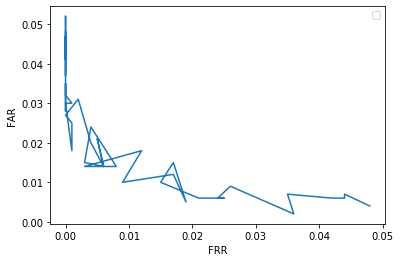

In [23]:
#1. train subject , train subject

counter_true_false_result(0,89, 0,89) 


Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist task125sample num_2000pair_ouer shift8 failed
0.122 . 
 97.5 % 
 true_result: 1950 false_result: 50 
 TP: 955 FN: 45 FRR: 0.045 
 TN: 995 FP: 5 FAR: 0.005 
 EER: 0.024999999999999998 

0.124 . 
 97.75 % 
 true_result: 1955 false_result: 45 
 TP: 958 FN: 42 FRR: 0.042 
 TN: 997 FP: 3 FAR: 0.003 
 EER: 0.022500000000000003 

0.126 . 
 97.4 % 
 true_result: 1948 false_result: 52 
 TP: 954 FN: 46 FRR: 0.046 
 TN: 994 FP: 6 FAR: 0.006 
 EER: 0.026 

0.128 . 
 97.85 % 
 true_result: 1957 false_result: 43 
 TP: 958 FN: 42 FRR: 0.042 
 TN: 999 FP: 1 FAR: 0.001 
 EER: 0.021500000000000002 

0.13 . 
 98.1 % 
 true_result: 1962 false_result: 38 
 TP: 968 FN: 32 FRR: 0.032 
 TN: 994 FP: 6 FAR: 0.006 
 EER: 0.019 

0.132 . 
 98.1 % 
 true_result: 1962 false_result: 38 
 TP: 965 FN: 35 FRR: 0.035 
 TN: 997 FP: 3 FAR: 0.003 
 EER: 0.019000000000000003 

0.134 . 
 98.0 % 
 true_result: 1960 fals

No handles with labels found to put in legend.


0.198 . 
 96.85 % 
 true_result: 1937 false_result: 63 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 937 FP: 63 FAR: 0.063 
 EER: 0.0315 



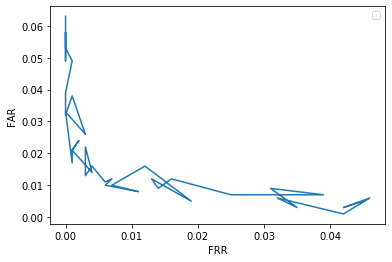

In [24]:
#2. train subject , new subject

counter_true_false_result(0,89, 90,107)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist task125sample num_2000pair_ouer shift8 failed
0.182 . 
 88.55 % 
 true_result: 1771 false_result: 229 
 TP: 818 FN: 182 FRR: 0.182 
 TN: 953 FP: 47 FAR: 0.047 
 EER: 0.11449999999999999 

0.184 . 
 90.3 % 
 true_result: 1806 false_result: 194 
 TP: 842 FN: 158 FRR: 0.158 
 TN: 964 FP: 36 FAR: 0.036 
 EER: 0.097 

0.186 . 
 89.7 % 
 true_result: 1794 false_result: 206 
 TP: 845 FN: 155 FRR: 0.155 
 TN: 949 FP: 51 FAR: 0.051 
 EER: 0.103 

0.188 . 
 91.65 % 
 true_result: 1833 false_result: 167 
 TP: 881 FN: 119 FRR: 0.119 
 TN: 952 FP: 48 FAR: 0.048 
 EER: 0.08349999999999999 

0.19 . 
 91.0 % 
 true_result: 1820 false_result: 180 
 TP: 873 FN: 127 FRR: 0.127 
 TN: 947 FP: 53 FAR: 0.053 
 EER: 0.09 

0.192 . 
 92.5 % 
 true_result: 1850 false_result: 150 
 TP: 899 FN: 101 FRR: 0.101 
 TN: 951 FP: 49 FAR: 0.049 
 EER: 0.07500000000000001 

0.194 . 
 91.95 % 
 true_result: 1839 fals

No handles with labels found to put in legend.


0.278 . 
 83.05 % 
 true_result: 1661 false_result: 339 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 661 FP: 339 FAR: 0.339 
 EER: 0.1695 



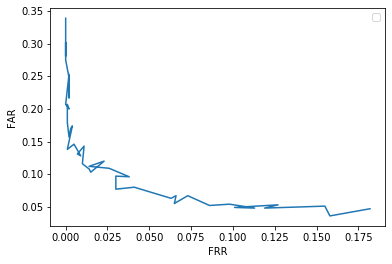

In [27]:

#3. new subject , new subject

counter_true_false_result(90,107, 0,89)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist task125sample num_2000pair_ouer shift8 failed
0.182 . 
 89.55 % 
 true_result: 1791 false_result: 209 
 TP: 820 FN: 180 FRR: 0.18 
 TN: 971 FP: 29 FAR: 0.029 
 EER: 0.1045 

0.184 . 
 90.95 % 
 true_result: 1819 false_result: 181 
 TP: 849 FN: 151 FRR: 0.151 
 TN: 970 FP: 30 FAR: 0.03 
 EER: 0.0905 

0.186 . 
 89.65 % 
 true_result: 1793 false_result: 207 
 TP: 837 FN: 163 FRR: 0.163 
 TN: 956 FP: 44 FAR: 0.044 
 EER: 0.10350000000000001 

0.188 . 
 92.35 % 
 true_result: 1847 false_result: 153 
 TP: 876 FN: 124 FRR: 0.124 
 TN: 971 FP: 29 FAR: 0.029 
 EER: 0.0765 

0.19 . 
 91.55 % 
 true_result: 1831 false_result: 169 
 TP: 877 FN: 123 FRR: 0.123 
 TN: 954 FP: 46 FAR: 0.046 
 EER: 0.08449999999999999 

0.192 . 
 91.95 % 
 true_result: 1839 false_result: 161 
 TP: 870 FN: 130 FRR: 0.13 
 TN: 969 FP: 31 FAR: 0.031 
 EER: 0.0805 

0.194 . 
 92.95 % 
 true_result: 1859 false_result

No handles with labels found to put in legend.


0.278 . 
 77.25 % 
 true_result: 1545 false_result: 455 
 TP: 1000 FN: 0 FRR: 0.0 
 TN: 545 FP: 455 FAR: 0.455 
 EER: 0.2275 



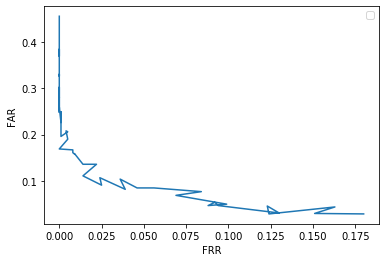

In [28]:
#4. new subject , new subject

counter_true_false_result(90,107, 90,107)

Creation of the directory /content/drive/My Drive/z_Middle Verification Threshold_EER/ h5 file- cosian dist task125sample num_2000pair_ouer shift8 failed
0.146 . 
 96.0 % 
 true_result: 1920 false_result: 80 
 TP: 932 FN: 68 FRR: 0.068 
 TN: 988 FP: 12 FAR: 0.012 
 EER: 0.04 

0.148 . 
 96.6 % 
 true_result: 1932 false_result: 68 
 TP: 945 FN: 55 FRR: 0.055 
 TN: 987 FP: 13 FAR: 0.013 
 EER: 0.034 

0.15 . 
 96.45 % 
 true_result: 1929 false_result: 71 
 TP: 940 FN: 60 FRR: 0.06 
 TN: 989 FP: 11 FAR: 0.011 
 EER: 0.0355 

0.152 . 
 96.75 % 
 true_result: 1935 false_result: 65 
 TP: 950 FN: 50 FRR: 0.05 
 TN: 985 FP: 15 FAR: 0.015 
 EER: 0.0325 

0.154 . 
 96.65 % 
 true_result: 1933 false_result: 67 
 TP: 945 FN: 55 FRR: 0.055 
 TN: 988 FP: 12 FAR: 0.012 
 EER: 0.0335 

0.156 . 
 96.05 % 
 true_result: 1921 false_result: 79 
 TP: 941 FN: 59 FRR: 0.059 
 TN: 980 FP: 20 FAR: 0.02 
 EER: 0.0395 

0.158 . 
 96.45 % 
 true_result: 1929 false_result: 71 
 TP: 953 FN: 47 FRR: 0.047 
 TN: 976 

No handles with labels found to put in legend.


0.20199999999999999 . 
 96.4 % 
 true_result: 1928 false_result: 72 
 TP: 988 FN: 12 FRR: 0.012 
 TN: 940 FP: 60 FAR: 0.06 
 EER: 0.036 



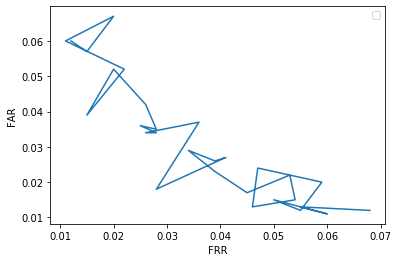

In [32]:
#5. all subject , all subject

counter_true_false_result(0,107, 0,107)

In [0]:
def subject_Predict_generator(mymodel, subject_arr, img_arr ):
  sn = len(subject_arr)
  imgn = len(img_arr)
  pre_GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled= subject_arr,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled= img_arr)

  pre_Subject = mymodel.predict_generator(pre_GenTestData,steps=np.ceil(imgn*sn/batch_size))
  return pre_Subject


In [0]:
'''
**  subjects  (train subject (ts) , new subject (ns) ):

1) Train subject i (ts[i] )
2) Train Subject i and Train Subject j (ts[i] , ts[j] )
3) Train subject and New subject  (ts , ns)
4) New subject i ( ns[i] )
5) New Subject i and New Subject j (ns[i] , ns[j] )

'''

'\n* train subject (ts) , new subject (ns) :\n1) ts[i] , ts[i] \n2) ts[i] , ts[j]\n3) ts , ns\n4) ns[i] , ns[i]\n5) ns[i] , ns[j]\n\n'

In [0]:
## 1) Train subject i (ts[i] )
str_subj_type = 'Train Subject i'
list_subject = subject_number_array_shuffled[5:8]
print(list_subject)


for i in range (len(list_subject) ):
    
  pre_subject_arr = [list_subject[i]]
  list_dist =[]

  ## Predict 1
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S1 = subject_Predict_generator(model, pre_subject_arr, pre_subject_img_number_array_shuffled)

  ## Predict 2
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S2 = subject_Predict_generator(model, pre_subject_arr, pre_subject_img_number_array_shuffled)

##  Euclidea distance 
  for i in range(min(len(pre_S1) , len(pre_S2))):
    
      d = distance.euclidean(pre_S1[i], pre_S2[i])
      #print(d)
      list_dist.append(d)

  ## Sort distance list
  list_dist.sort()

  ## Save in text file
  textFileName = "textFile" + str_subj_type + str(pre_subject_arr) + ".txt"
  completeName = os.path.join('/content/drive/My Drive/predict results file/', textFileName )

  with open(completeName, 'w') as f:
    f.write( str_subj_type + str(pre_subject_arr) + '\n')
    f.writelines(str(j) + '\n' for j in list_dist )
    
  with open(completeName, 'r') as f:  
    print(f.readlines(2) )


[65 33  6]
['Train_Subject_i[65]\n']
['Train_Subject_i[33]\n']
['Train_Subject_i[6]\n']


In [0]:
## 2) Train Subject i and Train Subject j (ts[i] , ts[j] )

str_subj_type = 'Train Subject i and Train Subject j'
list_subject = subject_number_array_shuffled[5:9]
print(list_subject)


for i in range (len(list_subject) -1 ):
    
  pre_subject_arr1 = [list_subject[i]]
  pre_subject_arr2 = [list_subject[i+1]]
  list_dist =[]

  ## Predict 1
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S1 = subject_Predict_generator(model, pre_subject_arr1, pre_subject_img_number_array_shuffled)

  ## Predict 2
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S2 = subject_Predict_generator(model, pre_subject_arr2, pre_subject_img_number_array_shuffled)

##  Euclidea distance 
  for i in range(min(len(pre_S1) , len(pre_S2))):
      d = distance.euclidean(pre_S1[i], pre_S2[i])
      #print(d)
      list_dist.append(d)

  ## Sort distance list
  list_dist.sort()

  ## Save in text file
  textFileName = "textFile" + str_subj_type + str(pre_subject_arr1 + pre_subject_arr2) + ".txt"
  completeName = os.path.join('/content/drive/My Drive/predict results file/', textFileName )

  with open(completeName, 'w') as f:
    f.write( str_subj_type + str(pre_subject_arr1 + pre_subject_arr2) + '\n')
    f.writelines(str(j) + '\n' for j in list_dist )

  with open(completeName, 'r') as f:  
    print(f.readlines(2) )


[65 33  6 35]
['Train_Subject_ij[65, 33]\n']
['Train_Subject_ij[33, 6]\n']
['Train_Subject_ij[6, 35]\n']


In [0]:
## 3) Train subject and New subject  (ts , ns)

str_subj_type = 'Train Subject and New Subject'
list_subject_train = subject_number_array_shuffled[0:4]
list_subject_new = new_subject[0:4]

print(list_subject_train , list_subject_new)


for i in range (min(len(list_subject_train),len(list_subject_new))):
    
  pre_subject_arr1 = [list_subject_train[i]]
  pre_subject_arr2 = [list_subject_new[i]]
  list_dist =[]

  # Predict 1
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S1 = subject_Predict_generator(model, pre_subject_arr1, pre_subject_img_number_array_shuffled)

  # Predict 2
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)
 
  pre_S2 = subject_Predict_generator(model, pre_subject_arr2, pre_subject_img_number_array_shuffled)

##  Euclidea distance 
  for i in range(min(len(pre_S1) , len(pre_S2))):
      d = distance.euclidean(pre_S1[i], pre_S2[i])
      #print(d)
      list_dist.append(d)

  ## Sort distance list
  list_dist.sort()

  ## Save in text file
  textFileName = "textFile_TS-NS" + str(pre_subject_arr1 + pre_subject_arr2) + ".txt"
  completeName = os.path.join('/content/drive/My Drive/predict results file/', textFileName )

  with open(completeName, 'w') as f:
    f.write( str_subj_type + str(pre_subject_arr1 + pre_subject_arr2) + '\n')
    f.writelines(str(j) + '\n' for j in list_dist )

  with open(completeName, 'r') as f:  
    print(f.readlines(2) )


In [0]:

## 4) New subject i ( ns[i] )

str_subj_type = 'New Subject i'
list_subject = new_subject[0:8]
print(list_subject)


for i in range (len(list_subject) ):
    
  pre_subject_arr = [list_subject[i]]
  list_dist =[]

  ## Predict 1
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S1 = subject_Predict_generator(model, pre_subject_arr, pre_subject_img_number_array_shuffled)

  ## Predict 2
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S2 = subject_Predict_generator(model, pre_subject_arr, pre_subject_img_number_array_shuffled)

##  Euclidea distance 
  for i in range(min(len(pre_S1) , len(pre_S2))):
    
      d = distance.euclidean(pre_S1[i], pre_S2[i])
      #print(d)
      list_dist.append(d)

  ## Sort distance list
  list_dist.sort()

  ## Save in text file
  textFileName = "textFile" + str_subj_type + str(pre_subject_arr) + ".txt"
  completeName = os.path.join('/content/drive/My Drive/predict results file/', textFileName )

  with open(completeName, 'w') as f:
    f.write( str_subj_type + str(pre_subject_arr) + '\n')
    f.writelines(str(j) + '\n' for j in list_dist )
    
  with open(completeName, 'r') as f:  
    print(f.readlines(2) )


In [0]:
## 5) New Subject i and New Subject j (ns[i] , ns[j] )

str_subj_type = 'New Subject i and New Subject j'
list_subject = new_subject[:5]
print(list_subject)


for i in range (len(list_subject) -1 ):
    
  pre_subject_arr1 = [list_subject[i]]
  pre_subject_arr2 = [list_subject[i+1]]
  list_dist =[]

  ## Predict 1
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S1 = subject_Predict_generator(model, pre_subject_arr1, pre_subject_img_number_array_shuffled)

  ## Predict 2
  pre_subject_img_number_array_shuffled=np.arange(subject_img_number)
  np.random.shuffle(pre_subject_img_number_array_shuffled)

  pre_S2 = subject_Predict_generator(model, pre_subject_arr2, pre_subject_img_number_array_shuffled)

##  Euclidea distance 
  for i in range(min(len(pre_S1) , len(pre_S2))):
      d = distance.euclidean(pre_S1[i], pre_S2[i])
      #print(d)
      list_dist.append(d)

  ## Sort distance list
  list_dist.sort()

  ## Save in text file
  textFileName = "textFile" + str_subj_type + str(pre_subject_arr1 + pre_subject_arr2) + ".txt"
  completeName = os.path.join('/content/drive/My Drive/predict results file/', textFileName )

  with open(completeName, 'w') as f:
    f.write( str_subj_type + str(pre_subject_arr1 + pre_subject_arr2) + '\n')
    f.writelines(str(j) + '\n' for j in list_dist )

  with open(completeName, 'r') as f:  
    print(f.readlines(2) )
